### https://www.census.gov/data/developers/data-sets.html

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import os
from urllib.request import urlopen
import json
import requests
import seaborn as sns

path=os.getcwd()

In [2]:
bse='S0101_C01_001E'
gp=['state','zip code tabulation area']

In [3]:
vbles=pd.read_csv(path+'/kmeans_variables2.csv')

### Get data

#### imputation

In [4]:
raw=pd.read_csv(path+'/02_raw.csv')
raw.shape

(33120, 105)

In [5]:
num_cols=[x for x in list(raw.columns) if x not in [bse]+gp]
dta=raw[num_cols]
dta=np.array(dta)

In [6]:
dta.shape

(33120, 102)

In [7]:
df=raw[num_cols].describe()
df.T

,count,mean,std,min,25%,50%,75%,max
S0102_C01_061E,2906.0,0.001165,0.000504,0.000250,0.000813,0.001079,0.001413,0.004846
S0102_C01_065E,2906.0,0.000206,0.000202,0.000005,0.000070,0.000141,0.000267,0.001952
S1601_C01_004E,32776.0,0.065902,0.133229,0.000000,0.002271,0.017076,0.059660,1.000000
S1601_C01_012E,32776.0,0.013301,0.036777,0.000000,0.000000,0.001260,0.010580,0.666667
S0101_C03_001E,32776.0,0.501860,0.068707,0.000000,0.477240,0.495959,0.519254,1.000000
...,...,...,...,...,...,...,...,...
S0101_C05_015E,32776.0,0.032709,0.032648,0.000000,0.020062,0.028574,0.038294,1.000000
S0101_C05_016E,32776.0,0.025521,0.029773,0.000000,0.014204,0.021549,0.030103,1.000000
S0101_C05_017E,32776.0,0.018575,0.024315,0.000000,0.008869,0.015158,0.022472,1.000000
S0101_C05_018E,32776.0,0.012888,0.021375,0.000000,0.004750,0.010040,0.015976,1.000000


#### don't need impute with sophisticated ways 
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, random_state=0)
imp.fit(dta)
dta_imputed = imp.transform(dta)

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dta)
dta_imputed=imp.transform(dta)

In [9]:
tmp=pd.DataFrame(dta_imputed, columns=num_cols)

In [10]:
df=tmp.describe().T.reset_index()
df[:3]

,index,count,mean,std,min,25%,50%,75%,max
0,S0102_C01_061E,33120.0,0.001165,0.000149,0.000250,0.001165,0.001165,0.001165,0.004846
1,S0102_C01_065E,33120.0,0.000206,0.000060,0.000005,0.000206,0.000206,0.000206,0.001952
2,S1601_C01_004E,33120.0,0.065902,0.132535,0.000000,0.002388,0.017492,0.062568,1.000000


In [11]:
mdl_dta=pd.concat([raw[gp+[bse]],tmp],axis=1)
mdl_dta.shape

(33120, 105)

In [12]:
zp=mdl_dta[gp+[bse]]
num_cols=[x for x in list(mdl_dta.columns) if x not in gp+[bse]]

## run the model
### https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [13]:
dta=mdl_dta[num_cols]
raw_array=np.array(dta)
raw_array.shape

(33120, 102)

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = StandardScaler()
scaler = MinMaxScaler()
#scaler = RobustScaler()
scaler.fit(raw_array)
raw_array=scaler.transform(raw_array)
raw_array.shape

(33120, 102)

In [15]:
mdl_input_scaled=pd.concat([mdl_dta[gp+[bse]], pd.DataFrame(raw_array,columns=num_cols)],axis=1)
mdl_input_scaled[:3]

,state,zip code tabulation area,S0101_C01_001E,S0102_C01_061E,S0102_C01_065E,S1601_C01_004E,S1601_C01_012E,S0101_C03_001E,S0101_C03_002E,S0101_C03_003E,...,S0101_C05_010E,S0101_C05_011E,S0101_C05_012E,S0101_C05_013E,S0101_C05_014E,S0101_C05_015E,S0101_C05_016E,S0101_C05_017E,S0101_C05_018E,S0101_C05_019E
0,54,25245,600,0.199199,0.103082,0.0,0.0,0.470000,0.000000,0.000000,...,0.000000,0.033333,0.056667,0.033333,0.000000,0.118333,0.058333,0.000000,0.066667,0.0
1,54,25268,964,0.199199,0.103082,0.0,0.0,0.490664,0.056017,0.037959,...,0.020747,0.009336,0.033195,0.037344,0.044606,0.025934,0.071577,0.062241,0.028008,0.0
2,54,25286,1700,0.199199,0.103082,0.0,0.0,0.540000,0.005294,0.016993,...,0.044706,0.036471,0.044706,0.024118,0.008824,0.038824,0.022353,0.004706,0.020000,0.0


In [16]:
df=pd.DataFrame(raw_array,columns=num_cols).describe().T.reset_index()
df[:3]

,index,count,mean,std,min,25%,50%,75%,max
0,S0102_C01_061E,33120.0,0.199199,0.032451,0.0,0.199199,0.199199,0.199199,1.0
1,S0102_C01_065E,33120.0,0.103082,0.030770,0.0,0.103082,0.103082,0.103082,1.0
2,S1601_C01_004E,33120.0,0.065902,0.132535,0.0,0.002388,0.017492,0.062568,1.0


## selection number of clusters
### https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

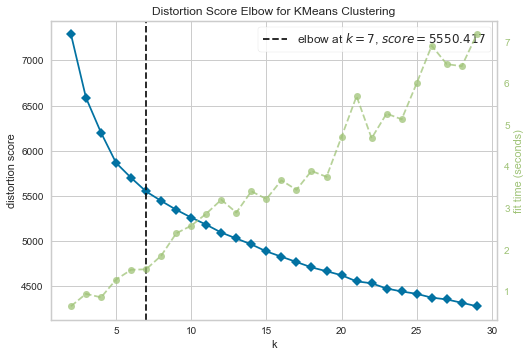

In [30]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(raw_array)        # Fit data to visualizer
visualizer.show() 

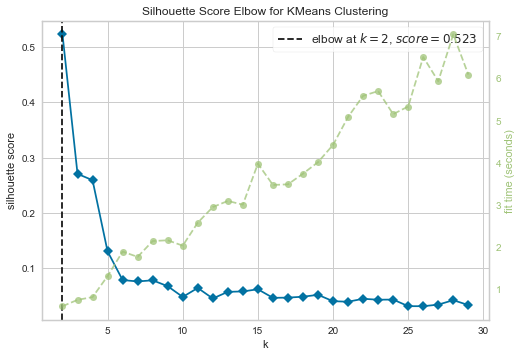

In [31]:
#S(i) close to 0 means that the point is between two clusters
#If it is closer to -1, then we would be better off assigning it to the other clusters
#If S(i) is close to 1, then the point belongs to the ‘correct’ cluster

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(raw_array)        # Fit data to visualizer
visualizer.show() 

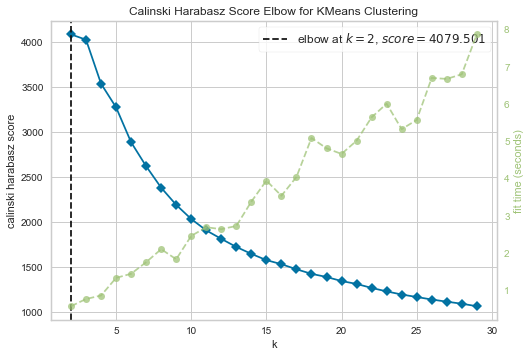

In [32]:
# Higher the Calinski-Harabasz Index value, better the clustering model

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(raw_array)        # Fit data to visualizer
visualizer.show() 

## final model

In [32]:
from sklearn.cluster import KMeans

km1=KMeans(n_clusters=30)
km=km1.fit_predict(raw_array)
lbl=pd.DataFrame(km)
lbl.columns=['Label']
lbl['ct']=1
lbl[:3]

,Label,ct
0,12,1
1,12,1
2,13,1


In [33]:
center=pd.DataFrame(km1.cluster_centers_)
center=center.values
center=np.transpose(center)
center.shape

(102, 30)

In [41]:
center=pd.DataFrame(center)
center['variable']=num_cols

center=center.merge(vbles[['Name','Label']], how='inner',left_on='variable',right_on='Name')
center.to_csv(path+'/03_cluster_center.csv')
center[:4]

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,variable,Name,Label
0,0.199199,1.991994e-01,0.178516,0.199199,0.199199,0.200616,0.198799,0.198757,0.201365,0.199199,...,0.199048,0.199199,1.991994e-01,0.199199,0.199199,0.198951,0.309892,S0102_C01_061E,S0102_C01_061E,"Estimate!!Total!!PLACE OF BIRTH, NATIVITY AND ..."
1,0.103082,1.030819e-01,0.168114,0.103082,0.103082,0.102071,0.099738,0.123845,0.097999,0.103082,...,0.102939,0.103082,1.030819e-01,0.103082,0.103082,0.107724,0.083036,S0102_C01_065E,S0102_C01_065E,Estimate!!Total!!LANGUAGE SPOKEN AT HOME AND A...
2,0.020534,2.537457e-02,0.101998,0.039749,0.053381,0.023564,0.063114,0.543669,0.034830,0.023245,...,0.015450,0.024800,3.434361e-02,0.027549,0.233534,0.809288,0.054455,S1601_C01_004E,S1601_C01_004E,Estimate!!Total!!Population 5 years and over!!...
3,0.004122,3.469447e-18,0.383760,0.004498,0.075130,0.005331,0.054772,0.022570,0.012037,0.004465,...,0.005056,0.003973,3.469447e-18,0.005063,0.002264,0.003020,0.030111,S1601_C01_012E,S1601_C01_012E,Estimate!!Total!!Population 5 years and over!!...


#### center Rank

In [59]:
cr=center.copy()
cr.index=cr['variable']
cr=cr.drop(['Label','Name','variable'],1)
cr=cr.T

for c in list(cr.columns):
    cr[c]=cr[c].rank(ascending=False)
    
cr=cr.T

In [62]:
cr
## each row is ranked between 1 and 30: highest value ranked 1 and lowest value ranked 30

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
variable,,,,,,,,,,,,,,,,,,,,,
S0102_C01_061E,13.5,13.5,28.0,13.5,13.5,5.0,25.0,26.0,3.0,13.5,...,2.0,27.0,30.0,22.0,13.5,13.5,13.5,13.5,24.0,1.0
S0102_C01_065E,13.5,13.5,2.0,13.5,13.5,24.0,27.0,3.0,28.0,13.5,...,4.0,26.0,30.0,22.0,13.5,13.5,13.5,13.5,5.0,29.0
S1601_C01_004E,27.0,22.0,6.0,16.0,11.0,24.0,9.0,2.0,17.0,25.0,...,4.0,15.0,8.0,29.0,23.0,18.0,20.0,5.0,1.0,10.0
S1601_C01_012E,23.0,29.0,1.0,21.0,3.0,17.0,5.0,10.0,11.0,22.0,...,8.0,6.0,4.0,19.0,24.0,29.0,18.0,26.0,25.0,7.0
S0101_C03_001E,5.0,30.0,19.0,26.0,29.0,17.0,11.0,10.0,22.0,4.0,...,15.0,23.0,25.0,13.0,8.0,3.0,20.0,1.0,16.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0101_C05_015E,15.0,6.0,22.0,7.0,28.0,14.0,24.0,27.0,17.0,3.0,...,23.0,19.0,21.0,11.0,5.0,20.0,16.0,30.0,12.0,9.0
S0101_C05_016E,14.0,5.0,21.0,9.0,28.0,13.0,24.0,26.0,15.0,11.0,...,20.0,18.0,19.0,12.0,6.0,27.0,22.0,30.0,16.0,8.0
S0101_C05_017E,13.0,14.0,19.0,18.0,28.0,11.0,27.0,25.0,16.0,5.0,...,23.0,20.0,21.0,12.0,6.0,26.0,15.0,30.0,10.0,8.0


In [69]:
topN=[]
for c in [0]:#list(cr.columns):
    top=cr[[c]].sort_values(c)[[c]][:10]

In [71]:
top

,0
variable,
S2403_C01_007E,3.0
S2403_C01_003E,4.0
S2403_C01_002E,4.0
S2403_C01_001E,4.0
S2401_C02_001E,4.0
S2403_C01_011E,5.0
S0101_C03_001E,5.0
S2403_C01_005E,5.0
S1702_C03_025E,5.0


#### label

In [72]:
lblr=lbl.values

lbl2=pd.concat([zp,pd.DataFrame(lblr, columns=['Label','ct'])],axis=1)
lbl2.to_csv(path+'/03_Label.csv',index=False)
lbl2[:3]

,state,zip code tabulation area,S0101_C01_001E,Label,ct
0,54,25245,600,12,1
1,54,25268,964,12,1
2,54,25286,1700,13,1


In [73]:
lbl_pct=lbl2.groupby('Label',as_index=False)['ct'].sum().sort_values('ct',ascending=False)
lbl_pct['pct']=lbl_pct['ct']/lbl_pct['ct'].sum()
lbl_pct

,Label,ct,pct
8,8,5668,0.171135
5,5,4396,0.132729
23,23,4339,0.131008
21,21,4331,0.130767
20,20,1685,0.050876
12,12,1651,0.049849
13,13,1542,0.046558
0,0,1220,0.036836
14,14,1046,0.031582
18,18,1043,0.031492


### final data to identify cluster features

In [74]:
clusters=lbl2.merge(raw,how='inner',on=gp+[bse])
clusters.shape

(33120, 107)

In [75]:
clusters[:3]

,state,zip code tabulation area,S0101_C01_001E,Label,ct,S0102_C01_061E,S0102_C01_065E,S1601_C01_004E,S1601_C01_012E,S0101_C03_001E,...,S0101_C05_010E,S0101_C05_011E,S0101_C05_012E,S0101_C05_013E,S0101_C05_014E,S0101_C05_015E,S0101_C05_016E,S0101_C05_017E,S0101_C05_018E,S0101_C05_019E
0,54,25245,600,12,1,NaN,NaN,0.0,0.0,0.470000,...,0.000000,0.033333,0.056667,0.033333,0.000000,0.118333,0.058333,0.000000,0.066667,0.0
1,54,25268,964,12,1,NaN,NaN,0.0,0.0,0.490664,...,0.020747,0.009336,0.033195,0.037344,0.044606,0.025934,0.071577,0.062241,0.028008,0.0
2,54,25286,1700,13,1,NaN,NaN,0.0,0.0,0.540000,...,0.044706,0.036471,0.044706,0.024118,0.008824,0.038824,0.022353,0.004706,0.020000,0.0


In [85]:
CT=clusters.groupby('Label',as_index=False)['ct'].sum()

In [86]:
num= [x for x in list(clusters.columns) if x not in gp+[bse,'Label','ct']]
cluster_name=CT.merge(clusters.groupby('Label',as_index=False)[num].mean(),on='Label',how='inner')

In [87]:
clusters.to_csv(path+'/03_cluster_output.csv',index=False)
cluster_name.to_csv(path+'/03_cluster_names.csv',index=False)

In [89]:
cluster_name=cluster_name.T

In [91]:
cluster_name=cluster_name.reset_index()
cluster_name

,index,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,Label,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000
1,ct,1220.000000,108.000000,314.000000,203.000000,228.000000,4396.000000,855.000000,703.000000,5668.000000,...,1685.000000,4331.000000,508.000000,4339.000000,603.000000,60.000000,321.000000,36.000000,296.000000,491.000000
2,S0102_C01_061E,NaN,NaN,0.000889,NaN,NaN,0.001588,0.001151,0.001136,0.001277,...,0.001295,0.001133,0.000759,0.000830,NaN,NaN,NaN,NaN,0.001109,0.001674
3,S0102_C01_065E,NaN,NaN,0.000574,NaN,NaN,0.000076,0.000156,0.000798,0.000094,...,0.000330,0.000137,0.000115,0.000072,NaN,NaN,NaN,NaN,0.000652,0.000167
4,S1601_C01_004E,0.020534,0.025375,0.101998,0.039749,0.053381,0.023585,0.063114,0.543669,0.032809,...,0.247328,0.041602,0.078567,0.015451,0.024800,0.034344,0.027549,0.233534,0.809288,0.054455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,S0101_C05_015E,0.032957,0.055288,0.025644,0.051388,0.016514,0.033210,0.024635,0.021037,0.030099,...,0.024979,0.027992,0.026654,0.035407,0.056252,0.026937,0.030396,0.003512,0.033760,0.041027
100,S0101_C05_016E,0.025441,0.047534,0.019176,0.032745,0.006239,0.026431,0.017537,0.016022,0.023040,...,0.019396,0.020995,0.020333,0.026459,0.039868,0.014795,0.018732,0.003736,0.022510,0.034731
101,S0101_C05_017E,0.018108,0.017535,0.014397,0.014450,0.005680,0.020028,0.011255,0.011735,0.017060,...,0.013641,0.014305,0.013929,0.019172,0.028780,0.011509,0.017501,0.001404,0.021474,0.026158
102,S0101_C05_018E,0.012406,0.010070,0.010449,0.016299,0.004708,0.014137,0.008121,0.008655,0.012125,...,0.010177,0.009945,0.009638,0.013169,0.016905,0.028629,0.013597,0.001389,0.012108,0.019014


In [93]:
cluster_name=cluster_name[cluster_name['index']!='Label'].rename(columns={'index':'Name'})
cluster_name=vbles[['Name','Label']].merge(cluster_name,how='inner',on='Name')
cluster_name.to_csv(path+'/03_cluster_names2.csv',index=False)